In [ ]:
# Prasad Jadhav

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

import mlflow

from sklearn import metrics

import pickle

In [2]:
df = pd.read_csv('data/iris.csv')

In [3]:
df

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]

In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


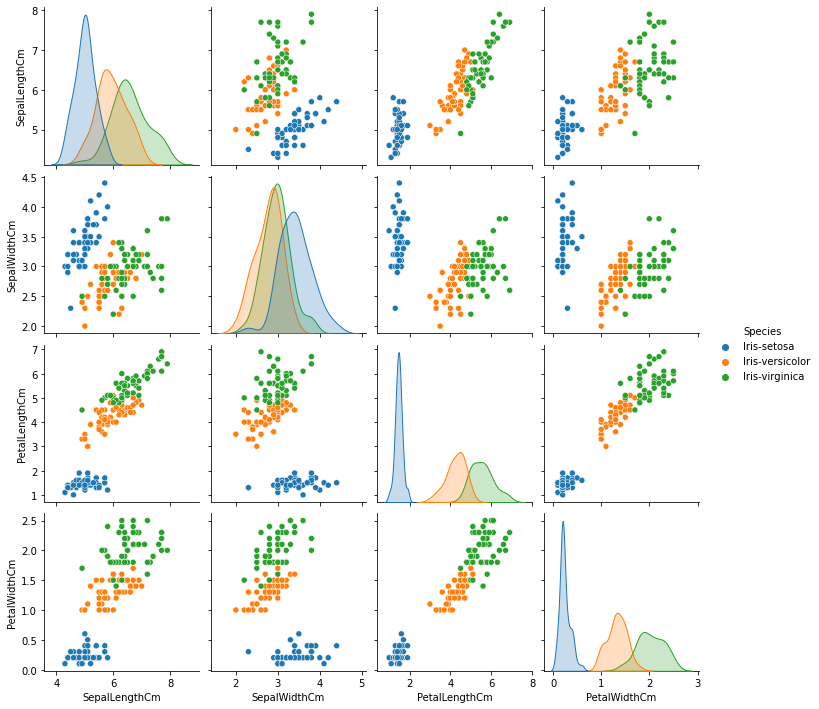

In [7]:
sns.pairplot(df, hue = 'Species')

In [8]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [10]:
scaler = StandardScaler()

X_train_rescaled = pd.DataFrame(scaler.fit_transform(X_train), 
                                    columns = X_train.columns, 
                                    index = X_train.index)

X_train_rescaled.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
61        0.015440     -0.119255       0.225127      0.356382
92       -0.099845     -1.040395       0.113560     -0.028648
112       1.053005     -0.119255       0.950314      1.126441
2        -1.367980      0.341315      -1.392599     -1.312081
141       1.168290      0.111030       0.727180      1.383128

In [11]:
scaler.var_, scaler.scale_

(array([0.75240992, 0.18856824, 3.21355867, 0.60709104]),
 array([0.86741565, 0.43424445, 1.79264014, 0.77916047]))

In [12]:
X_test_rescaled = pd.DataFrame(scaler.transform(X_test), 
                                   columns = X_test.columns, 
                                   index = X_test.index)

X_test_rescaled.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
114      -0.099845     -0.579825       0.727180      1.511471
62        0.130725     -1.961535       0.113560     -0.285335
33       -0.445700      2.644166      -1.336815     -1.312081
107       1.629430     -0.349540       1.396583      0.741412
7        -1.022125      0.801885      -1.281032     -1.312081

In [13]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_rescaled, y_train)

y_test_pred = knn_classifier.predict(X_test_rescaled)
metrics.accuracy_score(y_test, y_test_pred)

0.9736842105263158

In [14]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_rescaled, y_train)

y_test_pred = lr_classifier.predict(X_test_rescaled)
metrics.accuracy_score(y_test, y_test_pred)

0.9736842105263158

In [15]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_rescaled, y_train)

y_test_pred = nb_classifier.predict(X_test_rescaled)
metrics.accuracy_score(y_test, y_test_pred)

1.0

In [16]:
dt_classifier = DecisionTreeClassifier(max_depth = 3)
dt_classifier.fit(X_train_rescaled, y_train)

y_test_pred = dt_classifier.predict(X_test_rescaled)
metrics.accuracy_score(y_test, y_test_pred)

0.9736842105263158

In [17]:
sv_classifier = SVC()
sv_classifier.fit(X_train_rescaled, y_train)

y_test_pred = sv_classifier.predict(X_test_rescaled)
metrics.accuracy_score(y_test, y_test_pred)

0.9736842105263158

In [18]:
pickle.dump(scaler, open('models/standard_scaler.pkl', 'wb'))
pickle.dump(knn_classifier, open('models/knn_model.pkl', 'wb'))
pickle.dump(lr_classifier, open('models/lr_model.pkl', 'wb'))
pickle.dump(nb_classifier, open('models/nb_model.pkl', 'wb'))
pickle.dump(dt_classifier, open('models/dt_model.pkl', 'wb'))
pickle.dump(sv_classifier, open('models/sv_model.pkl', 'wb'))

In [21]:
# Experiment 1 - Training KNN Classifier

with mlflow.start_run():
    mlflow.set_tag("developer", "Prasad Jadhav")
    mlflow.set_tag("algorithm", "KNeighbors")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/iris.csv")
    k = 53
    mlflow.log_param("n_neighbors", k)
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_rescaled, y_train)
    y_test_pred = knn_classifier.predict(X_test_rescaled)
    acc = metrics.accuracy_score(y_test, y_test_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(knn_classifier, artifact_path="models")
    mlflow.log_artifact("models/standard_scaler.pkl")

In [22]:
# Experiment 2 - Training Logistic Regression

with mlflow.start_run():
    mlflow.set_tag("developer", "Prasad Jadhav")
    mlflow.set_tag("algorithm", "Logistic")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/iris.csv")
    C = 0.1
    mlflow.log_param("C", C)
    lr_classifier = LogisticRegression(C=C)
    lr_classifier.fit(X_train_rescaled, y_train)
    y_test_pred = lr_classifier.predict(X_test_rescaled)
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(lr_classifier, artifact_path="models")
    mlflow.log_artifact("models/standard_scaler.pkl")

In [23]:
# Experiment 3 - Training Naive Bayes

with mlflow.start_run():
    mlflow.set_tag("developer", "Prasad Jadhav")
    mlflow.set_tag("algorithm", "GaussianNB")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/iris.csv")
    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train_rescaled, y_train)
    y_test_pred = nb_classifier.predict(X_test_rescaled)
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(nb_classifier, artifact_path="models")
    mlflow.log_artifact("models/standard_scaler.pkl")

In [25]:
# Experiment 4 - Training Decision Tree

with mlflow.start_run():
    mlflow.set_tag("developer", "Prasad Jadhav")
    mlflow.set_tag("algorithm", "DecisionTree")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/iris.csv")
    depth = 3
    mlflow.log_param("max_depth", depth)
    dt_classifier = DecisionTreeClassifier(max_depth = depth)
    dt_classifier.fit(X_train_rescaled, y_train)
    y_test_pred = dt_classifier.predict(X_test_rescaled)
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(dt_classifier, artifact_path="models")
    mlflow.log_artifact("models/standard_scaler.pkl")

In [26]:
# Experiment 5 - Training Support Vector Classifier

with mlflow.start_run():
    mlflow.set_tag("developer", "Prasad Jadhav")
    mlflow.set_tag("algorithm", "SVM")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/iris.csv")
    C = 0.1
    mlflow.log_param("C", C)
    sv_classifier = SVC(C=C)
    sv_classifier.fit(X_train_rescaled, y_train)
    y_test_pred = sv_classifier.predict(X_test_rescaled)
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(sv_classifier, artifact_path="models")
    mlflow.log_artifact("models/standard_scaler.pkl")

In [28]:
# Experiment 6 - Training KNN Classifier with Hyperparameter Tuning
# Enabling automatic MLflow logging for scikit-learn runs

mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run():
    tuned_parameters = [{'n_neighbors':[i for i in range(1, 51)], 'p':[1, 2]}]

    clf = GridSearchCV(
        estimator=KNeighborsClassifier(), 
        param_grid=tuned_parameters, 
        scoring='accuracy',
        cv=5,
        return_train_score=True,
        verbose=1
    )
    clf.fit(X_train, y_train)
    
    # Disabling autologging
    mlflow.sklearn.autolog(disable=True)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [30]:
#Thank You!